<a href="https://colab.research.google.com/github/SeanBaek111/ColabPractice/blob/main/EasyOCR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [37]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [38]:
!wget https://www.consultanz.com.au/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2020/09/Bruce-Highway-blog-774x400.jpg.webp -O 01.jpg

--2022-12-02 02:18:15--  https://www.consultanz.com.au/wp-content/webp-express/webp-images/doc-root/wp-content/uploads/2020/09/Bruce-Highway-blog-774x400.jpg.webp
Resolving www.consultanz.com.au (www.consultanz.com.au)... 180.92.196.23
Connecting to www.consultanz.com.au (www.consultanz.com.au)|180.92.196.23|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20496 (20K) [image/webp]
Saving to: ‘01.jpg’

01.jpg              100%[===================>]  20.02K   101KB/s    in 0.2s    

2022-12-02 02:18:17 (101 KB/s) - ‘01.jpg’ saved [20496/20496]



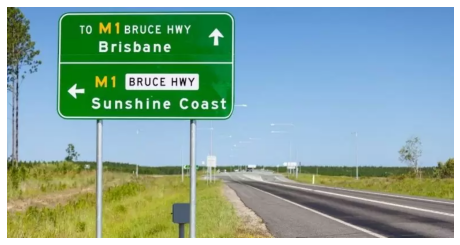

In [39]:
img_path = '01.jpg'

img = cv2.imread(img_path)

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()

In [40]:
result = reader.readtext(img_path)

result

[([[122, 22], [322, 22], [322, 52], [122, 52]],
  'To MIBRUCE HWY',
  0.7304638525269529),
 ([[156, 54], [290, 54], [290, 84], [156, 84]],
  'Brisbane',
  0.9999974290408719),
 ([[150, 114], [194, 114], [194, 146], [150, 146]], 'M1', 0.7637284444246804),
 ([[206, 116], [328, 116], [328, 142], [206, 142]],
  'BRUCE HWY',
  0.9932076669140193),
 ([[142, 152], [386, 152], [386, 184], [142, 184]],
  'Sunshine Coast',
  0.9849439024583744)]

In [41]:
result[1]

([[156, 54], [290, 54], [290, 84], [156, 84]], 'Brisbane', 0.9999974290408719)

Brisbane
BRUCE HWY
Sunshine Coast


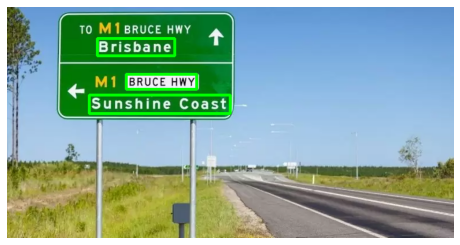

In [42]:
THRESHOLD = 0.9
for bbox, text, conf in result:
  if conf > THRESHOLD:
    print(text)
    cv2.rectangle(img, pt1=bbox[0], pt2=bbox[2], color=(0,255,0), thickness=3)


plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.axis('off')
plt.show()